In [2]:
from tensorflow import keras

# Fashion MNIST 데이터셋

케라스에 빌트인 되어 있는 Fashion MNIST 데이터를 불러오겠습니다.

**Fashion MNIST** 데이터 셋은 우리가 잘 알고 있는 숫자 손글씨 이미지 데이터 셋인 MNIST와 유사한 형태를 지녔는데요.

이름에서 알 수 있는 것처럼 패션 의류 제품 이미지를 10개의 항목으로 분류해 놓았습니다.
MNIST 데이터셋 이 신경망을 배울 때 사용하는 대표적인 예제로 과다하게 많이 사용되다 보니

보다 다양한 형태의 학습에 사용하기 위해서 유럽의 전자 상거래 회사인 [Zalando](https://www.zalando.com/)의 연구소에서 제공한 이미지 데이터 셋입니다.

Zalando Research의 Github Repo에 있는 데이터를 참고하시면 좋을 것 같습니다 (https://github.com/zalandoresearch/fashion-mnist)

Fashion-MNIST는 총 70,000개의 이미지로 60,000개의 training data 세트와 10,000 개의 test data 세트로 구성되어 있습니다.

각 이미지는 width와 height가 28 $\times$ 28개의 픽셀로 이루어진 낮은 해상도의 회색조 이미지입니다.

각 픽셀은 0(검은색)부터 255(흰색) 사이의 값을 가집니다.

(MNIST 데이터와 동일한 이미지 수, 동일한 해상도입니다!)



10개의 제품 분류는 다음과 같습니다.

**레이블 설명**

* 0 티셔츠/탑
* 1 바지
* 2 풀오버(스웨터의 일종)
* 3 드레스
* 4 코트
* 5 샌들
* 6 셔츠
* 7 스니커즈
* 8 가방
* 9 앵클 부츠

In [3]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

첫번째 훈련 데이터입니다.  
MNIST처럼 28 × 28 행렬이고 원소는 0부터 255까지의 정수이며 픽셀의 밝기를 나타냅니다.  
신발처럼 보이네요.

In [4]:
import numpy as np
np.set_printoptions(linewidth=200,threshold=1000)

print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

`plt.imshow`를 사용해서 이미지로 보죠.

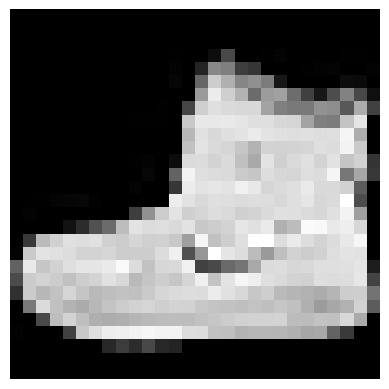

In [5]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(train_images[0], cmap=plt.cm.gray)
plt.show()

라벨입니다.

In [6]:
print(train_labels[0])

9


0부터 9까지의 라벨은 다음과 같은 패션 아이템과 대응합니다.

In [7]:
class_names=['Tshirt/top','Troser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

shape은 MNIST와 동일하네요.

In [8]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


훈련 데이터의 앞 25장을 5$\times$5 모아찍기로 출력해 보겠습니다.

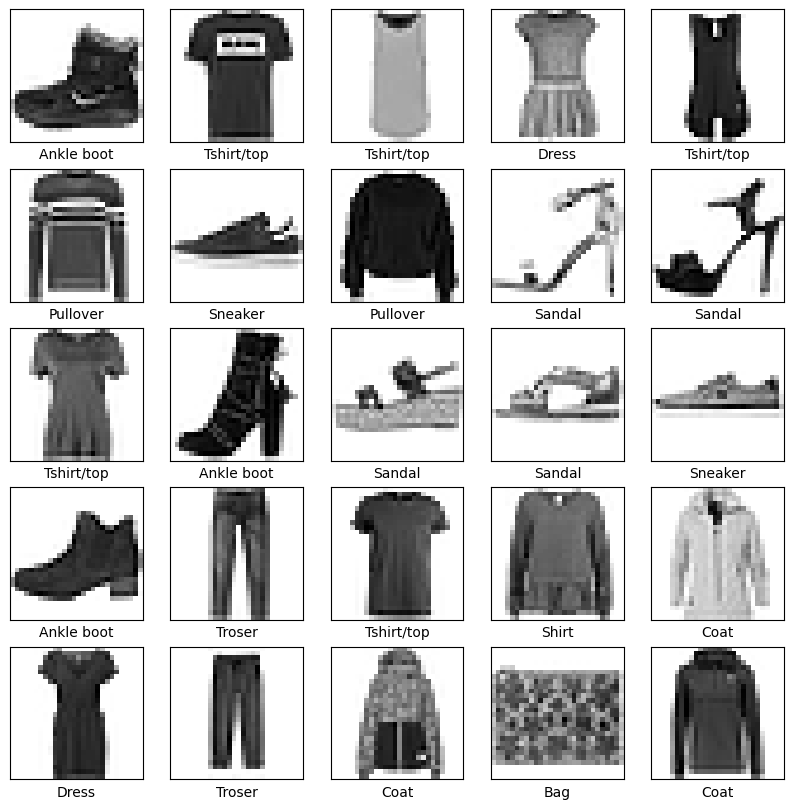

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

학습을 위해 각 데이터를 flatten하고  0과 1 사이로 리스케일링 해줍시다.

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images / 255

MNIST에서 구성했던 신경망으로 학습해 보죠.  
Fashion MNIST는 MNIST만큼 기하적으로 단순하고 분명한 구조가 아닌지라 MNIST에 비해선 정확도가 많이 떨어지지만 이정도면 나쁘지는 않은 정확도입니다.

In [11]:
from keras import layers

model = keras.Sequential([
    layers.Dense(512, input_shape=(784,), activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="RMSprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\n")
print(f"test_acc: {test_acc}")

c:\Users\USER\miniconda3\envs\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7423 - loss: 0.7396
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8533 - loss: 0.3974
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8740 - loss: 0.3405
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8853 - loss: 0.3103
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8907 - loss: 0.2974
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8683 - loss: 0.3597


test_acc: 0.8691999912261963


첫번째 등장하는 테스트 이미지를 9(Ankle Boot)라고 대답했는데 맞았네요.

In [ ]:
predictions = model.predict(test_images)
print(predictions[0])

plt.imshow(test_images[0].reshape(28,28), cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.xlabel(class_names[test_labels[0]])
plt.show()

confusion matrix입니다.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

plt.figure(figsize=(8,8))
confusion = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(classification_report(test_labels, np.argmax(predictions, axis=1)))

**[과제1] 각 라벨에 대하여 클래스 이름, Precision, Recall, F1-score가 순서로 출력되도록 바닐라 파이썬과 numpy만을 사용하여 코드를 작성하시오. 위 싸이킷런으로 출력한 결과와 비교하시오.**

**[과제2] 다음과 같이 틀린 조합이 더 밝게 표시되도록 시각화 하시오.**  
![](https://drive.google.com/thumbnail?id=1mCEqCOklBAhVxpnttJmpvmxvggt7kPtQ&sz=s4000)

**[과제3] 신경망이 가장 많이 착각한 패션 아이템 조합이 무엇인지 출력하는 코드를 작성하시오. 첫 25개를 5$\times$5 모아찍기로 출력하시오.**

# CIFAR10 데이터셋

케라스에 빌트인 되어 있는 CIFAR10 데이터를 불러오겠습니다.

In [ ]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

첫번째 훈련 데이터입니다.  
MNIST나 Fashion MNIST와는 달리 어떤 이미지인지 식별이 안되네요.  
3차원 텐서이고 안은 3차원 벡터들로 채워져 있습니다.

In [ ]:
print(train_images[0])

`plt.imshow`를 사용해서 이미지로 보죠.  
개구리 컬러 이미지네요.

In [ ]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(train_images[0])
plt.show()

라벨은 6입니다.

In [ ]:
print(train_labels[0])

0부터 9까지의 라벨은 다음과 같이 대응합니다.

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']

CIFAR10은 32$\times$32 해상도의 컬러사진 훈련용 50,000장, 테스트 10,000장입니다.  
3은 RGB 채널입니다.  
위에서 출력한 3차원 벡터는 컬러 화소에 대한 정보를 담고 있습니다.  
밑바닥부터 시작하는 딥러닝에서는 C$\times$H$\times$W 포맷을 따랐는데 케라스는 H$\times$W$\times$C 포맷을 따릅니다.  
파이토치는 C$\times$H$\times$W 포맷을 따르고 `plt.imshow`는 H$\times$W$\times$C 포맷을 따릅니다.  
![](https://drive.google.com/thumbnail?id=1MZsJm_asjnSfYcesgi8hznJ7WvUVEhzT&sz=s4000)  
라벨은 위에서 출력한 바와 같이 브라켓이 씌워져 있어서 1이 뒤에 붙습니다.

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

훈련 데이터의 앞 25장을 5$\times$5 모아찍기로 출력해 보겠습니다.

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

학습을 위해 각 데이터를 flatten하고 0과 1사이로 리스케일링해줍시다.

In [ ]:
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images / 255

해상도가 다르고 컬러사진이기 때문에 MNIST와 Fasion MNIST에서 사용했던 신경망을 그대로 사용할 수는 없습니다.  
입력 뉴런의 수를 입력 데이터의 차원으로 수정해 줍시다.  
데이터가 복잡하니 학습회수도 늘려주겠습니다.  
정확도가 낮네요.  
나중에 CNN을 사용하면 많은 성능향상을 얻을 수 있습니다.

In [1]:
model = keras.Sequential([
    layers.Dense(512, input_shape=(32 * 32 * 3,), activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="RMSprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=15, batch_size=128)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\n")
print(f"test_acc: {test_acc}")

NameError: name 'keras' is not defined

# CIFAR100 데이터셋

**[실습1] (10분) (i) CIFAR100 데이터를 불러오시오.**

**(ii) shape을 출력하시오.**

**(iii) 훈련 데이터의 앞 25장을 5$\times$5 모아찍기로 출력해 보시오.**

**(iii) 데이터를 flatten하고 0과 1사이로 리스케일링해주시오.**

**(iv) 신경망을 구성한후 학습시키고 평가하시오.**